After Mapping all the prepared features for our data and changing our problem into binary classification of 0 and 1, We can now train our machine learning model using Random Forest Classifier.

In [0]:
import pandas as pd
from pandas import HDFStore, DataFrame
from pandas import read_hdf
from time import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Reading the HD5 file where we stored our df_final_train and df_final_test dataframe earlier using read_hdf.

In [0]:
df_final_train = read_hdf('final_data.h5', 'train_df', mode='r')
df_final_test = read_hdf('final_data.h5', 'test_df', mode='r')

In [21]:
df_final_train.head(2)

,source_node,destination_node,indicator_link,followers_jaccard,followees_jaccard,followers_cosine,followees_cosine,adar_in,follows_back,shortest_path,same_comp,page_rank_s,page_rank_d,katz_s,katz_d
0,273084,1505602,1,0.0,0.0,0,0,0,0,4,1,0.000002,3.459963e-07,0.000773,0.000756
1,1284805,1252082,1,0.0,0.0,0,0,0,1,3,1,0.000006,2.202787e-07,0.001007,0.000744


In [22]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'followers_jaccard', 'followees_jaccard', 'followers_cosine',
       'followees_cosine', 'adar_in', 'follows_back', 'shortest_path',
       'same_comp', 'page_rank_s', 'page_rank_d', 'katz_s', 'katz_d'],
      dtype='object')

#Splittin X and Y

We are gonna store the target variable(indicator_link) in a seperate variable y_train and y_test for train and test data and after dropping unnecessary variables like indicator_link, source_node, destination_node and store in x_train and x_test, so we can later use in our model.  

In [0]:
x_train = df_final_train.drop(['source_node', 'destination_node', 'indicator_link'], axis=1)
x_test = df_final_test.drop(['source_node', 'destination_node', 'indicator_link'], axis=1)

In [0]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

#Model Performance

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.metrics import f1_score

In [51]:
rforest = RandomForestClassifier(random_state=105)

rforest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=105,
                       verbose=0, warm_start=False)

Random Forest Training Prediction and Accuracy

In [58]:
Rtrain_pred = rforest.predict(x_train)

from sklearn.metrics import classification_report,confusion_matrix
print('Classification Report: \n', classification_report(y_train,Rtrain_pred))

print('='*60)

from sklearn.metrics import accuracy_score
accurracy = accuracy_score(y_train,Rtrain_pred)
print('Accuracy: \n', accurracy*100)

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96     50187
           1       0.99      0.93      0.96     49814

    accuracy                           0.96    100001
   macro avg       0.96      0.96      0.96    100001
weighted avg       0.96      0.96      0.96    100001

Accuracy: 
 96.0930390696093


In [60]:
f1_score(y_train,Rtrain_pred)

0.9596696774193548

Random Forest Testing Prediction and Accuracy

In [54]:
R_pred = rforest.predict(x_test)

from sklearn.metrics import classification_report,confusion_matrix
print('Classification Report: \n', classification_report(y_test,R_pred))

print('='*60)

from sklearn.metrics import accuracy_score
accurracy = accuracy_score(y_test,R_pred)
print('Accuracy: \n', accurracy*100)

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     25088
           1       0.98      0.89      0.93     24913

    accuracy                           0.93     50001
   macro avg       0.94      0.93      0.93     50001
weighted avg       0.94      0.93      0.93     50001

Accuracy: 
 93.26413471730565


#Hyperparameter Tunning

To get the best papmeter for our model we are gonna perform Hyperparameter Tunning and then run our model with best parameter and evaluate our model.

Checking Training and Testing Score at 5 different n_estimator with max_depth = 5.

Estimators =  10 Train Score 0.9145729720459611 test Score 0.9127482162812688
Estimators =  50 Train Score 0.9242437099579957 test Score 0.9218919551479821
Estimators =  100 Train Score 0.9162755228080727 test Score 0.9145107830054667
Estimators =  250 Train Score 0.9174882126018002 test Score 0.9159974232338416
Estimators =  450 Train Score 0.91795970852979 test Score 0.9162872605446268


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

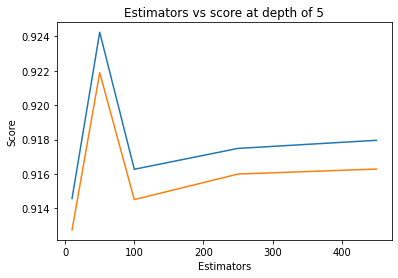

In [72]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    rforest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    rforest.fit(x_train,y_train)
    train_sc = f1_score(y_train,rforest.predict(x_train))
    test_sc = f1_score(y_test,rforest.predict(x_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

cheking Trainig and Testing score at 9 different max_depth with n_estimator= 115.

depth =  3 Train Score 0.9143275830486923 test Score 0.9132274218615092
depth =  9 Train Score 0.9339206117835942 test Score 0.9298871063576946
depth =  11 Train Score 0.9354120267260578 test Score 0.931092720824185
depth =  15 Train Score 0.9362374069668291 test Score 0.9317340441285354
depth =  20 Train Score 0.9360708500746786 test Score 0.9315601412351735
depth =  35 Train Score 0.9360708500746786 test Score 0.9315601412351735
depth =  50 Train Score 0.9360708500746786 test Score 0.9315601412351735
depth =  70 Train Score 0.9360708500746786 test Score 0.9315601412351735
depth =  130 Train Score 0.9360708500746786 test Score 0.9315601412351735


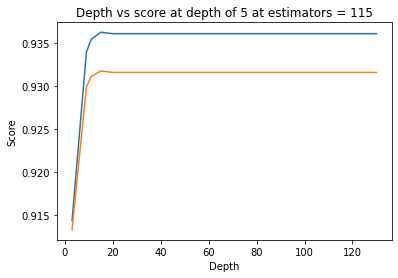

In [73]:
depths = [3,9,11,15,20,35,50,70,130]

train_scores = []
test_scores = []

for i in depths:
    rforest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    rforest.fit(x_train,y_train)
    train_sc = f1_score(y_train,rforest.predict(x_train))
    test_sc = f1_score(y_test,rforest.predict(x_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

**Checking for Best Parameter for Radom Forest Classifier**

In [74]:
start_time = time()
param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

rforest = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(rforest, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25)

rf_random.fit(x_train,y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [75]:
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print("--- %s seconds ---" % (time() - start_time))

mean test scores [0.9352483  0.93644392 0.9336812  0.93504106 0.93730751]
--- 263.26150846481323 seconds ---


In [76]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=28, min_samples_split=111,
                       min_weight_fraction_leaf=0.0, n_estimators=121,
                       n_jobs=-1, oob_score=False, random_state=25, verbose=0,
                       warm_start=False)


In [77]:
print(rf_random.best_params_)

{'max_depth': 14, 'min_samples_leaf': 28, 'min_samples_split': 111, 'n_estimators': 121}




---



---



**Now then we have the best parameters for our Random Forest Classifier, Let's run Random Forest Classifier again with with these parameters and make predictions, calculate the F1 score, see confusion matrix, and ROC Curve.**

In [0]:
rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=28, min_samples_split=111,
                       min_weight_fraction_leaf=0.0, n_estimators=121,
                       n_jobs=-1, oob_score=False, random_state=25, verbose=0,
                       warm_start=False)

In [0]:
rf.fit(x_train,y_train)
rf_train_pred = rf.predict(x_train)
rf_test_pred = rf.predict(x_test)

#Evaluation
Now after our model is trained we will test our model performance.

* **F1 Score**

 The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
 
*Let's check the F1 score of Train and Test*


In [85]:
print('F1 Train Score:', f1_score(y_train,rf_train_pred))
print('F1 Test Score:', f1_score(y_test,rf_test_pred))

F1 Train Score: 0.9382677032635948
F1 Test Score: 0.9313546745813016


* **Classification Report of Confusion Matrix and Accuracy**

 A confusion matrix is often used to describe the performance of a classification model. And is a summary of prediction results on a classification problem. 
 
 The number of correct and incorrect predictions are summarized with count values and broken down by each class.
> Train Confusion Matrix





In [87]:
from sklearn.metrics import classification_report,confusion_matrix
print('Classification Report: \n', classification_report(y_train,rf_train_pred))

print('='*60)

from sklearn.metrics import accuracy_score
accurracy = accuracy_score(y_train,rf_train_pred)
print('Accuracy: \n', accurracy*100)

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     50187
           1       0.99      0.89      0.94     49814

    accuracy                           0.94    100001
   macro avg       0.95      0.94      0.94    100001
weighted avg       0.95      0.94      0.94    100001

Accuracy: 
 94.140058599414


 >Test Confusion Matrix




In [86]:
from sklearn.metrics import classification_report,confusion_matrix
print('Classification Report: \n', classification_report(y_test,rf_test_pred))

print('='*60)

from sklearn.metrics import accuracy_score
accurracy = accuracy_score(y_test,rf_test_pred)
print('Accuracy: \n', accurracy*100)

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     25088
           1       0.99      0.88      0.93     24913

    accuracy                           0.94     50001
   macro avg       0.94      0.94      0.94     50001
weighted avg       0.94      0.94      0.94     50001

Accuracy: 
 93.52412951740965


Now Let's Visualise the Confusion Matrix, Precision Matrix and Recall Matrix

In [0]:
def plot_matrix(test_y,pred_y):
  A = confusion_matrix(test_y,pred_y) #Confusion Matrix

  B = (((A.T)/(A.sum(axis=1))).T) #Precision Matrix

  C = (A/A.sum(axis=0)) #Recall Matrix

  plt.figure(figsize=(20,4))

  labels= [0,1]
  cmap= sns.light_palette('blue')

  #Confusion Matrix
  plt.subplot(1,3,1)
  sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted Class')
  plt.ylabel('Original Class')
  plt.title("Confusion matrix")

  #Precision Matrix
  plt.subplot(1,3,2)
  sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted Class')
  plt.ylabel('Original Class')
  plt.title("Precision matrix")
  
  #Recall Marrix
  plt.subplot(1,3,3)
  sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted Class')
  plt.ylabel('Original Class')
  plt.title("Recall matrix")

  plt.show()

Confusion Matrix, Precision Matrix and Recall Matrix of Train

Train Matrix


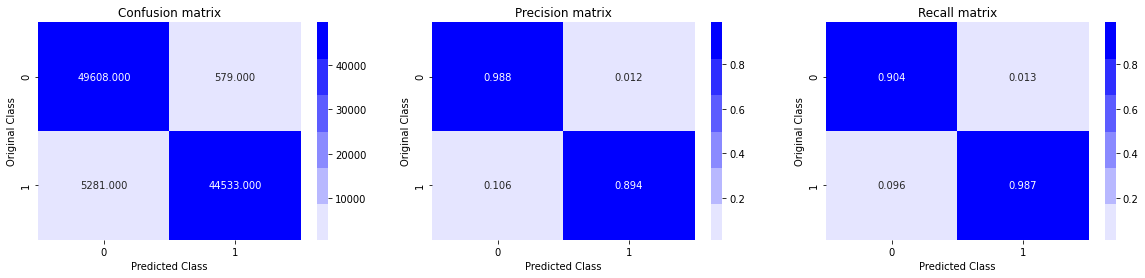

In [93]:
print('Train Matrix')
plot_matrix(y_train,rf_train_pred)

Confusion Matrix, Precision Matrix and Recall Matrix of Test

Test Matrix


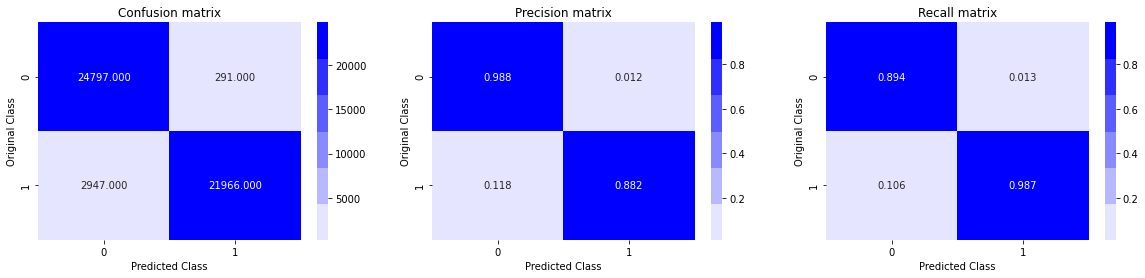

In [94]:
print('Test Matrix')
plot_matrix(y_test,rf_test_pred)

From this,
1. We can see that 291 are falsely classified as 'Negative' as they where actually 'Positive'

2. And Similarly 2947 were wrongly classified as 'Positive'.


---



* **ROC Curve and AUC**

 ROC curve is way for measuring the performance of a classification model. Higher the area under the curve(AUC), better the model is at predicting 0s as 0s and 1s as 1s.

 The ROC curve is plotted with True Positive Rate against the False Positive Rate where True Positive Rate is on y-axis and False Positive Rate is on the x-axis. The objective is to maximize area under the curve(AUC).
 

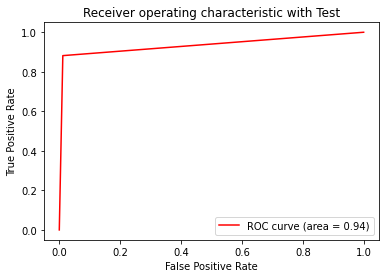

In [97]:
from sklearn.metrics import roc_curve, auc
False_Positive_Rate,True_Positive_Rate,Thresholds = roc_curve(y_test,rf_test_pred)
auc_sc = auc(False_Positive_Rate, True_Positive_Rate)
plt.plot(False_Positive_Rate, True_Positive_Rate, color='red',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with Test')
plt.legend()
plt.show()



---
**Now We Will visualise the important Features of the Dataset**



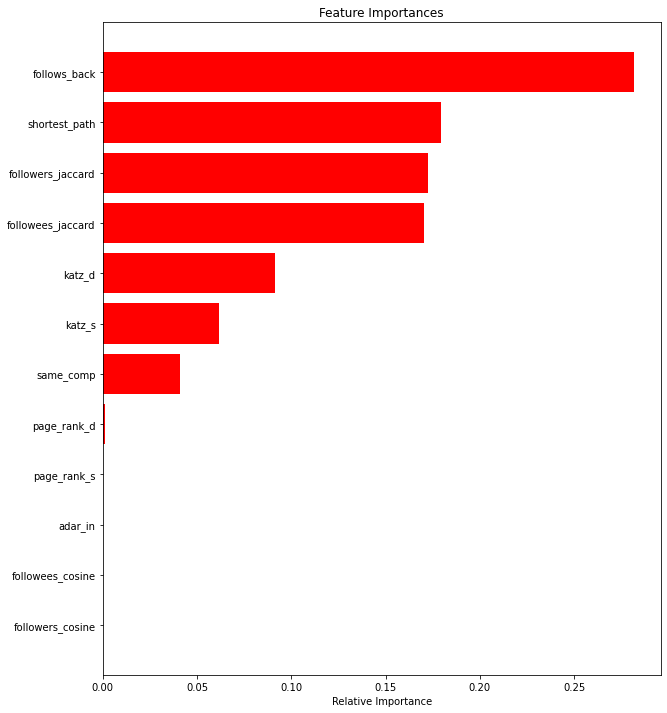

In [100]:
features = x_train.columns
importances = rf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Above Figure show that most important features of our dataset are follows_back, shortest_path, jaccard distance, Katz Centrality, and WCC.